# TASK - 2 TITANIC CLASSIFICATION USING SUPERVISED LEARNING ALGORITHM (SVM) AT BHARAT INTERNSHIP

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EXPLORE OUR DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.shape

(891, 15)

In [7]:
df.dtypes.value_counts()

object      5
int64       4
float64     2
bool        2
category    1
category    1
dtype: int64

In [8]:
df.drop(['deck', 'survived', 'who', 'alone'], axis = 1, inplace = True)
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive
0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,no
1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,yes
2,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,yes
3,1,female,35.0,1,0,53.1000,S,First,False,Southampton,yes
4,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,no


# VISUALIZING OUR DATASET

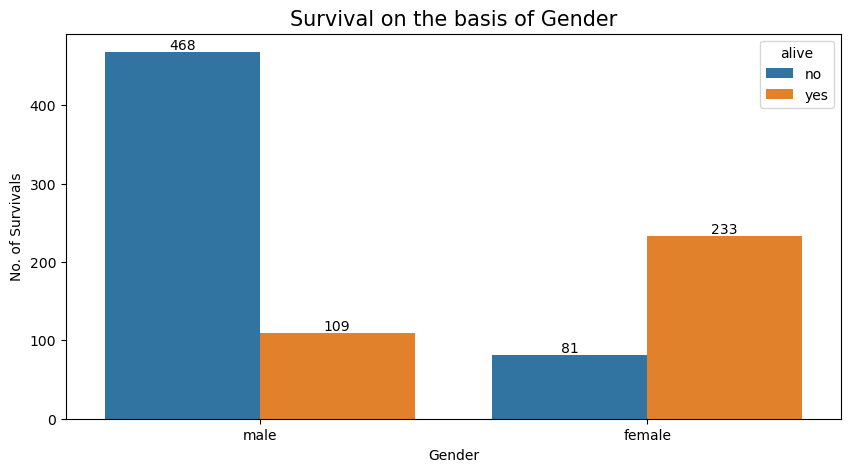

In [96]:
# Plotting a graph on the basis of their gender survival

plt.figure(figsize = (10, 5))
ax = sns.countplot(data = df, x = 'sex', hue = 'alive')
plt.xlabel('Gender', fontsize = 10)
plt.ylabel('No. of Survivals', fontsize = 10)
plt.title('Survival on the basis of Gender', fontsize = 15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', fontsize = 10, color = 'black', 
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

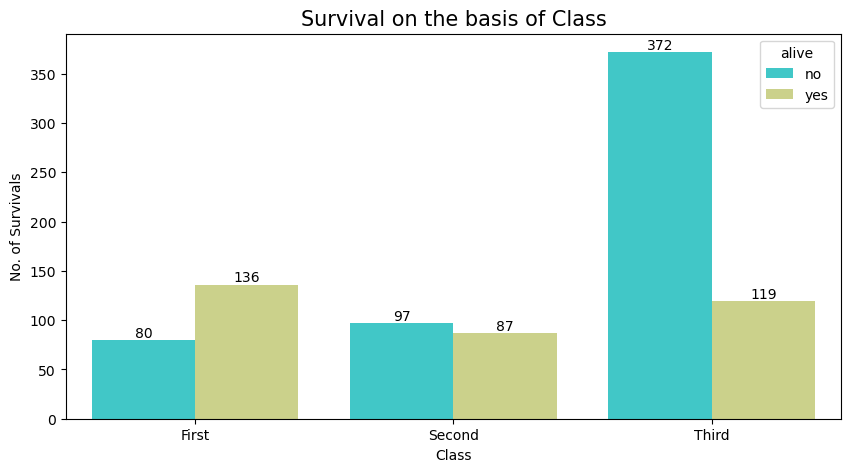

In [94]:
# Plotting a survival countplot on the basis of their Class

plt.figure(figsize = (10, 5))
ax = sns.countplot(data = df, x = 'class', hue = 'alive', palette = 'rainbow')
plt.xlabel('Class', fontsize = 10)
plt.ylabel('No. of Survivals', fontsize = 10)
plt.title('Survival on the basis of Class', fontsize = 15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', fontsize = 10, color = 'black',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

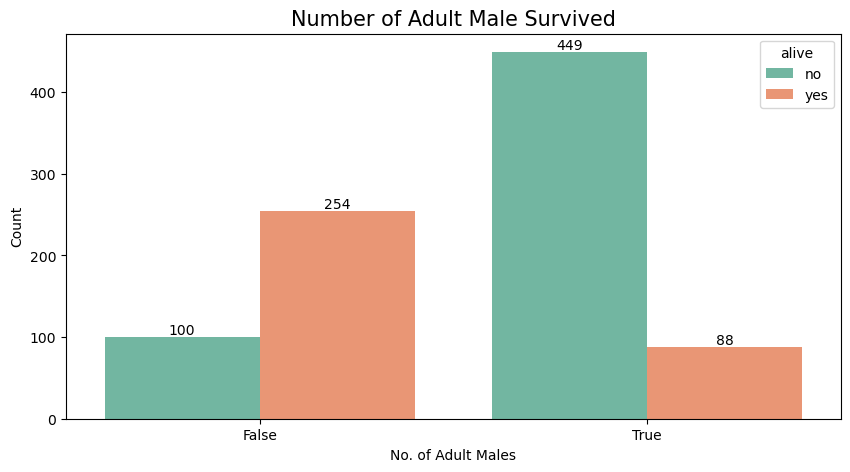

In [93]:
# Plotting Adult Male graph on the basis of their Survival

plt.figure(figsize = (10, 5))
ax = sns.countplot(data = df, x = 'adult_male', hue = 'alive', palette = 'Set2')
plt.xlabel('No. of Adult Males', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title('Number of Adult Male Survived', fontsize = 15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', fontsize = 10, color = 'black',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

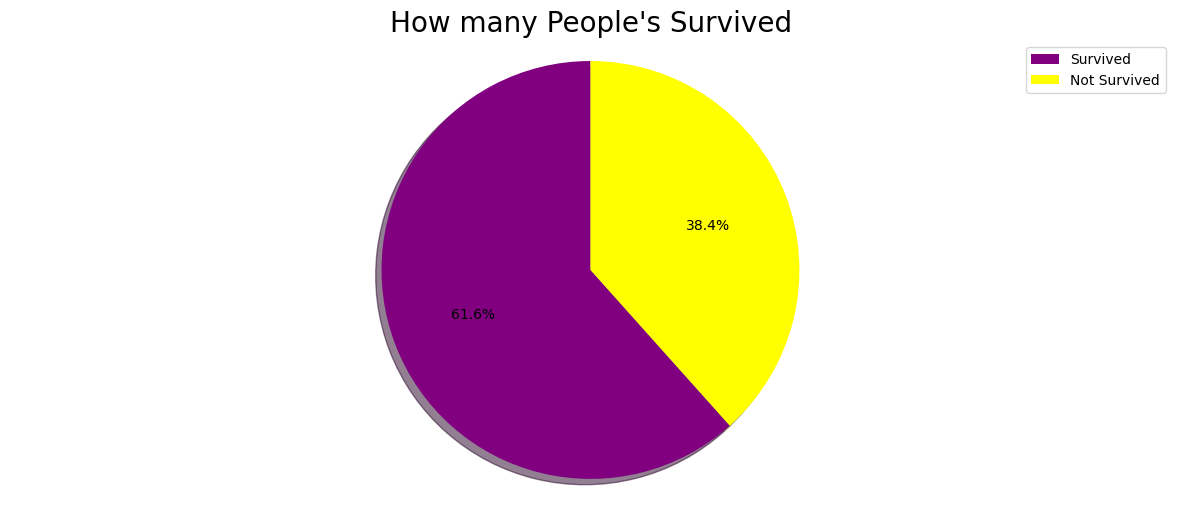

In [12]:
# Plotting a Pie plot on the basis of Overall Survival

alive = df.alive.value_counts()

labels = ['Survived', 'Not Survived']
sizes = alive.values
color = ['purple','yellow']
plt.figure(figsize = (15, 6))
plt.pie(sizes, colors = color, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.axis('equal')
plt.title("How many People's Survived", fontsize = 20)
plt.legend(labels)
plt.show()

In [13]:
# Filling missing values in 'age' with the mean age

df['age'].fillna(df['age'].mean(), inplace = True)

In [14]:
# Filling missing values in 'embarked' with the mode (most frequent value)

mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace = True)

In [15]:
# Filling missing values in 'embark_town' with the mode

mode_town = df['embark_town'].mode()[0]
df['embark_town'].fillna(mode_town, inplace = True)

In [16]:
# Re-Checking onto the Missing values

df.isnull().sum()

pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
adult_male     0
embark_town    0
alive          0
dtype: int64

# SPLITTING OUR INPUT FAETURES AND TARGET VARIABLES

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
print(X[:10])

[[3 'male' 22.0 1 0 7.25 'S' 'Third' True 'Southampton']
 [1 'female' 38.0 1 0 71.2833 'C' 'First' False 'Cherbourg']
 [3 'female' 26.0 0 0 7.925 'S' 'Third' False 'Southampton']
 [1 'female' 35.0 1 0 53.1 'S' 'First' False 'Southampton']
 [3 'male' 35.0 0 0 8.05 'S' 'Third' True 'Southampton']
 [3 'male' 29.69911764705882 0 0 8.4583 'Q' 'Third' True 'Queenstown']
 [1 'male' 54.0 0 0 51.8625 'S' 'First' True 'Southampton']
 [3 'male' 2.0 3 1 21.075 'S' 'Third' False 'Southampton']
 [3 'female' 27.0 0 2 11.1333 'S' 'Third' False 'Southampton']
 [2 'female' 14.0 1 0 30.0708 'C' 'Second' False 'Cherbourg']]


In [19]:
print(y[:10])

['no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes']


# ENCODING CATEGORICAL DATA

In [20]:
from sklearn.preprocessing import LabelEncoder

encode_1 = LabelEncoder()
encode_2 = LabelEncoder()
encode_3 = LabelEncoder()
encode_4 = LabelEncoder()
encode_5 = LabelEncoder()

X[:, 1] = encode_1.fit_transform(X[:, 1])
X[:, 6] = encode_2.fit_transform(X[:, 6])
X[:, 7] = encode_3.fit_transform(X[:, 7])
X[:, 8] = encode_4.fit_transform(X[:, 8])
X[:, 9] = encode_5.fit_transform(X[:, 9])

In [21]:
print(X[:10])

[[3 1 22.0 1 0 7.25 2 2 1 2]
 [1 0 38.0 1 0 71.2833 0 0 0 0]
 [3 0 26.0 0 0 7.925 2 2 0 2]
 [1 0 35.0 1 0 53.1 2 0 0 2]
 [3 1 35.0 0 0 8.05 2 2 1 2]
 [3 1 29.69911764705882 0 0 8.4583 1 2 1 1]
 [1 1 54.0 0 0 51.8625 2 0 1 2]
 [3 1 2.0 3 1 21.075 2 2 0 2]
 [3 0 27.0 0 2 11.1333 2 2 0 2]
 [2 0 14.0 1 0 30.0708 0 1 0 0]]


In [22]:
# Encoding our Target Variable

encode = LabelEncoder()

y = encode.fit_transform(y)

In [23]:
print(y[:10])

[0 1 1 1 0 0 0 0 1 1]


# SPLITTING THE VARIABLES INTO TRAINING AND TESTING

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [25]:
len(X_train)

712

In [26]:
len(X_test)

179

# FEATURE SCALING THE MODEL

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
print(X_train[:10])

[[ 0.84164211  0.75613751  0.69246422 -0.46561657 -0.47398086 -0.15495937
   0.57463154  0.84164211  0.82897756  0.57463154]
 [ 0.84164211  0.75613751 -0.01748231 -0.46561657 -0.47398086 -0.49997187
   0.57463154  0.84164211  0.82897756  0.57463154]
 [ 0.84164211 -1.32251077 -0.91048876  0.42796564 -0.47398086 -0.2897448
   0.57463154  0.84164211 -1.20630527  0.57463154]
 [ 0.84164211  0.75613751 -0.14717781 -0.46561657 -0.47398086 -0.49997187
   0.57463154  0.84164211  0.82897756  0.57463154]
 [ 0.84164211  0.75613751  0.31080875  0.42796564  0.75319867 -0.36191338
   0.57463154  0.84164211  0.82897756  0.57463154]
 [ 0.84164211 -1.32251077 -0.01748231 -0.46561657  1.98037819 -0.19299008
  -1.97451274  0.84164211 -1.20630527 -1.97451274]
 [-1.54105842  0.75613751 -0.01748231 -0.46561657 -0.47398086 -0.00956091
   0.57463154 -1.54105842  0.82897756  0.57463154]
 [ 0.84164211  0.75613751 -0.75782657  0.42796564 -0.47398086 -0.49935207
   0.57463154  0.84164211  0.82897756  0.57463154]
 

In [29]:
print(X_test[:10])

[[ 0.84164211 -1.32251077 -0.01748231  0.42796564 -0.47398086 -0.32582909
   0.57463154  0.84164211 -1.20630527  0.57463154]
 [-0.34970815  0.75613751 -0.01748231 -0.46561657 -0.47398086 -0.66756854
   0.57463154 -0.34970815  0.82897756  0.57463154]
 [-0.34970815  0.75613751 -1.06315095 -0.46561657 -0.47398086 -0.11569117
   0.57463154 -0.34970815  0.82897756  0.57463154]
 [ 0.84164211  0.75613751 -0.68149547 -0.46561657 -0.47398086 -0.48369786
   0.57463154  0.84164211  0.82897756  0.57463154]
 [-0.34970815 -1.32251077 -0.68149547 -0.46561657 -0.47398086 -0.44469498
   0.57463154 -0.34970815 -1.20630527  0.57463154]
 [-1.54105842  0.75613751  1.15045079  0.42796564 -0.47398086  1.10427621
   0.57463154 -1.54105842  0.82897756  0.57463154]
 [ 0.84164211  0.75613751 -0.75782657 -0.46561657 -0.47398086 -0.51412116
  -1.97451274  0.84164211  0.82897756 -1.97451274]
 [ 0.84164211  0.75613751  0.76879532 -0.46561657 -0.47398086 -0.49997187
   0.57463154  0.84164211  0.82897756  0.57463154]


# TRAINING OUR MODEL INTO SVM

In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [51]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive
0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,no
1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,yes
2,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,yes
3,1,female,35.0,1,0,53.1000,S,First,False,Southampton,yes
4,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,no


In [56]:
# Assuming new_passenger_data is a dictionary or DataFrame
new_passenger_data = {
    
    'pclass' : 3, 
    'sex': 'male', 
    'age': 22.0, 
    'sibsp' : 1, 
    'parch' : 0 , 
    'fare': 7.2500, 
    'embarked' : 'S', 
    'class' : 'Third',
    'adult_male' : 'True',
    'embark_town' : 'Southampton'

}

# Preprocessing the new passenger data
new_passenger_df = pd.DataFrame([new_passenger_data]) 
new_passenger_df = pd.get_dummies(new_passenger_df, columns = ['sex', 'embarked', 'class', 'adult_male', 'embark_town'])

scaled_data = scaler.transform(new_passenger_df)
prediction = svm.predict(scaled_data)  

print("Predicted Survival (0 = No, 1 = Yes):", prediction)

Predicted Survival (0 = No, 1 = Yes): [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [62]:
# Predictions on train set 

y_pred_train = svm.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [63]:
# Predictions on test set 

y_pred_test = svm.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

# EVALUATING THE MODEL WITH CONFUSION MATRIX, ACCURACY SCORE AND CLASSIFICATION REPORT

In [66]:
# Confusion Matrix used for Train Prediction and Test Prediction

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('The Confusion Matrix of the predicted train Model is:\n', cm_train)
print()
print('The Confusion Matrix of the predicted test Model is:\n', cm_test)

The Confusion Matrix of the predicted train Model is:
 [[413  24]
 [ 92 183]]

The Confusion Matrix of the predicted test Model is:
 [[108   4]
 [ 26  41]]


In [67]:
# Accuracy Score Calculated for Train Prediction and Test Prediction

print('The Accuracy Score for the train model performed is:\n', accuracy_score(y_train, y_pred_train))
print()
print('The Accuracy Score for the test model performed is:\n', accuracy_score(y_test, y_pred_test))

The Accuracy Score for the train model performed is:
 0.8370786516853933

The Accuracy Score for the test model performed is:
 0.8324022346368715


In [68]:
# Classification Report on Test Prediction

report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       112
           1       0.91      0.61      0.73        67

    accuracy                           0.83       179
   macro avg       0.86      0.79      0.81       179
weighted avg       0.85      0.83      0.82       179



# VISUALIZING THE ACTUAL AND PREDICTED TRAIN TEST SET CONFUSION MATRIX HEATMAP

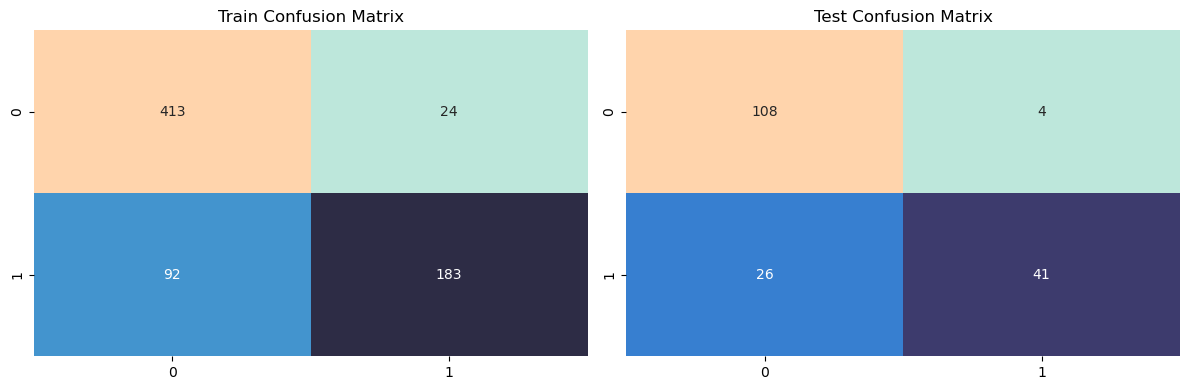

In [84]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# Training Prediction Confusion Matrix
sns.heatmap(cm_train, annot = True, fmt = 'd', cmap = 'icefire', cbar = False, ax = axes[0])
axes[0].set_title('Train Confusion Matrix')

# Testing Prediction Confusion Matrix
sns.heatmap(cm_test, annot = True, fmt = 'd', cmap = 'icefire', cbar = False, ax = axes[1])
axes[1].set_title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

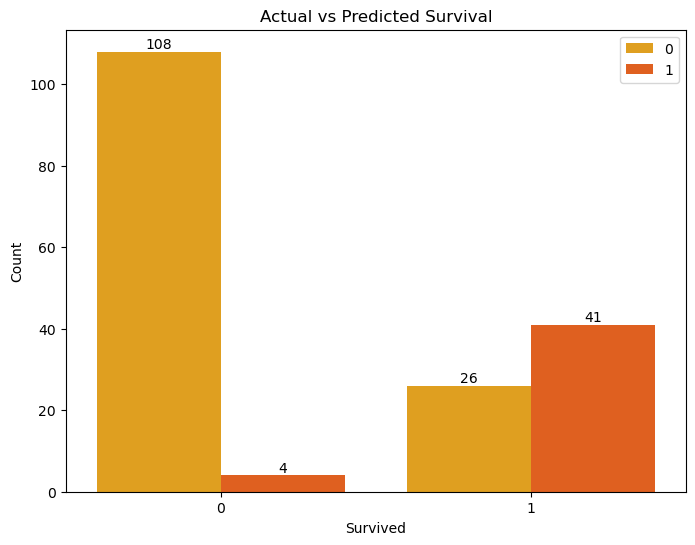

In [102]:
# Creating a DataFrame for plotting
plot_df = pd.DataFrame({'alive': y_test, 'y_pred_test': y_pred_test})

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'alive', data = plot_df, hue = y_pred_test, palette = "autumn_r")
plt.title("Actual vs Predicted Survival")
plt.xlabel("Survived")
plt.ylabel("Count")

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', fontsize = 10, color = 'black',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()